# 辐射gamma射线的混合型超新星遗迹

% all from vink 2020

超新星遗迹辐射伽马射线源往往有两种起源，强子起源与轻子起源，研究其的关系可以更好的帮助我们理解宇宙粒子逃脱的过程。

超新星被认为是保持银河系宇宙射线群的起源。

混合型超新星遗迹也往往与VHE伽马射线源相关联。根据Chicago TeV catalogue (http://tevcat.uchicago.edu/)，我们从文献中收集到的谱信息。需要注意，有一些TeV谱是很具假设一个纯幂律谱一盒的，厄尔其他的谱可能是从一个有截断的幂律谱拟合的。

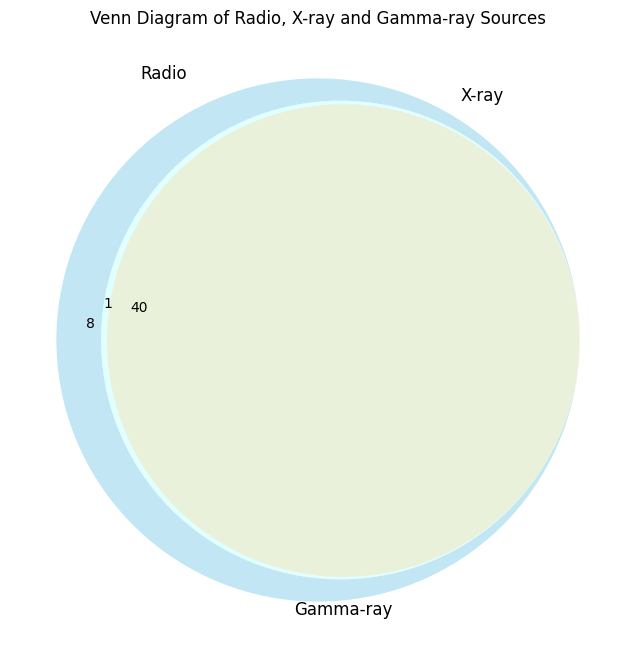

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# 读取 CSV 文件
file_path = "../cat/three-cat.csv"  # 替换为你的 CSV 文件路径
df = pd.read_csv(file_path, delimiter=',')

# 筛选不同波段的源
radio_sources = set(df[df['radio'].str.contains('yes', na=False)]['normalized_name'])
x_sources = set(df[df['Xray'].str.contains('yes &', na=False)]['normalized_name'])
gamma_teV_sources = set(df[df['gamma_TeV'].str.contains('yes &', na=False)]['normalized_name'])
gamma_GeV_sources = set(df[df['gamma_GeV'].str.contains('yes &', na=False)]['normalized_name'])

# 合并gamma TeV和gamma GeV波段的源
gamma_sources = gamma_teV_sources.union(gamma_GeV_sources)



# 绘制 Venn 图，并美化
plt.figure(figsize=(8, 8))
venn3([radio_sources, x_sources, gamma_sources],
      set_labels=('Radio', 'X-ray', 'Gamma-ray'),
      set_colors=('skyblue', 'lightgreen', 'coral'),
      alpha=0.5)
plt.title("Venn Diagram of Radio, X-ray and Gamma-ray Sources")

plt.show()

<Figure size 800x600 with 0 Axes>

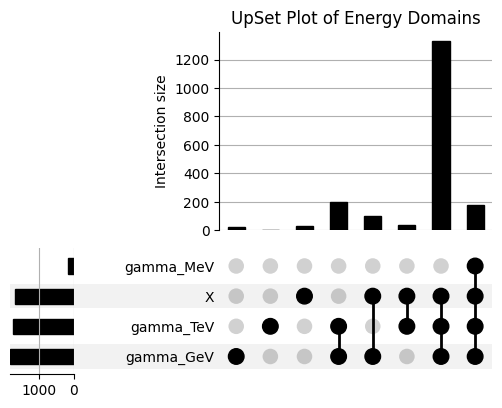

In [3]:
from matplotlib import pyplot as plt
from upsetplot import UpSet, from_indicators

# 创建 DataFrame 处理集合
df_upset = pd.DataFrame({
    "X": df["SNR_id"].isin(x_sources),
    "gamma_TeV": df["SNR_id"].isin(gamma_teV_sources),
    "gamma_GeV": df["SNR_id"].isin(gamma_GeV_sources),
    "gamma_MeV": df["SNR_id"].isin(gamma_MeV_sources),
})

# 绘制 UpSet 图
plt.figure(figsize=(8, 6))
UpSet(from_indicators(["X", "gamma_TeV", "gamma_GeV", "gamma_MeV"], df_upset)).plot()
plt.title("UpSet Plot of Energy Domains")
plt.show()